# Set up and Simulate

check this website it would do something similar https://sauln.github.io/blog/nerve-playground/

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from scipy.spatial import distance_matrix
from itertools import combinations

# Define points
points = np.array([
    [0, 0],
    [1, 0.2],
    [0.5, 0.9],
    [2, 0.1],
    [2.5, 0.8]
])
D = distance_matrix(points, points)

def plot_complex(eps=0.5, draw_rips=True, draw_cech=True):
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_aspect('equal')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 3)
    ax.set_title(f"ε = {eps:.2f}")

    # Solid points
    ax.plot(points[:, 0], points[:, 1], 'o', color='black', markersize=8)

    # Draw epsilon disks
    for p in points:
        circ = Circle(p, eps, fill=False, linestyle='dashed', color='gray', alpha=0.3)
        ax.add_patch(circ)

    if draw_rips:
        for i, j in combinations(range(len(points)), 2):
            if D[i, j] <= eps:
                ax.plot(*zip(points[i], points[j]), color='blue', lw=2, alpha=0.6)
        for i, j, k in combinations(range(len(points)), 3):
            if D[i, j] <= eps and D[i, k] <= eps and D[j, k] <= eps:
                triangle = np.array([points[i], points[j], points[k]])
                ax.fill(triangle[:, 0], triangle[:, 1], color='blue', alpha=0.15)

    if draw_cech:
        for i, j in combinations(range(len(points)), 2):
            if D[i, j] <= 2 * eps:
                ax.plot(*zip(points[i], points[j]), color='green', lw=2, alpha=0.6)
        for i, j, k in combinations(range(len(points)), 3):
            pi, pj, pk = points[i], points[j], points[k]
            a, b, c = D[i, j], D[i, k], D[j, k]
            s = (a + b + c) / 2
            try:
                area = np.sqrt(s * (s - a) * (s - b) * (s - c))
                radius = (a * b * c) / (4 * area)
                if radius <= eps:
                    triangle = np.array([pi, pj, pk])
                    ax.fill(triangle[:, 0], triangle[:, 1], color='green', alpha=0.15)
            except:
                continue

    ax.grid(True)
    plt.show()

In [15]:
epses = np.linspace(0,1.5,10)

# Cech Complex

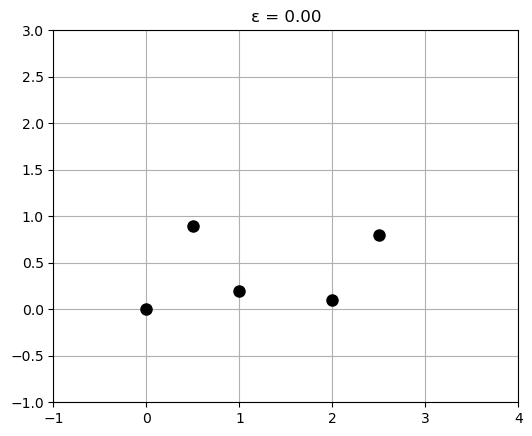

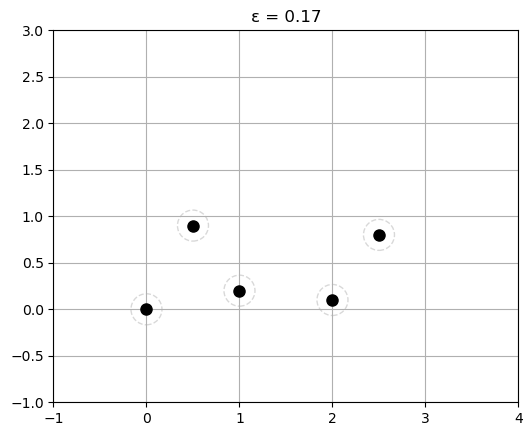

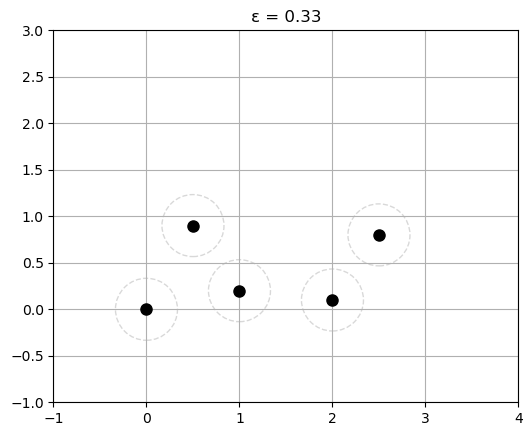

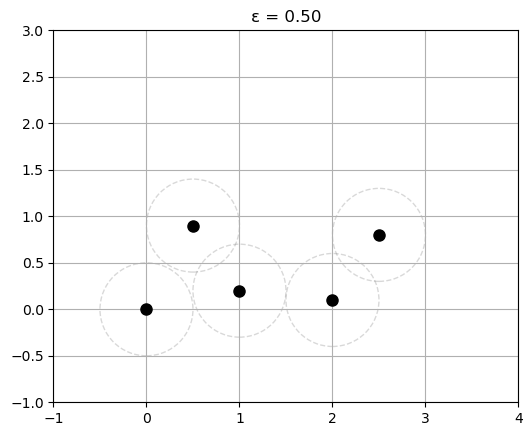

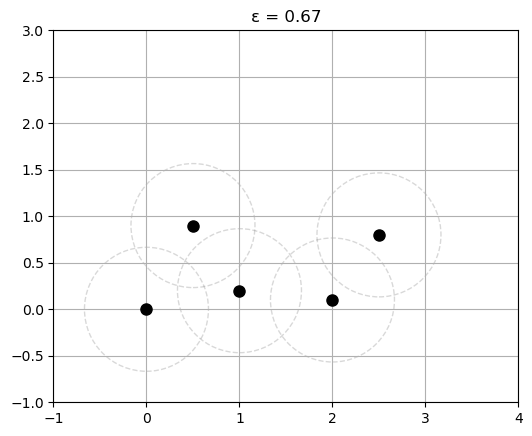

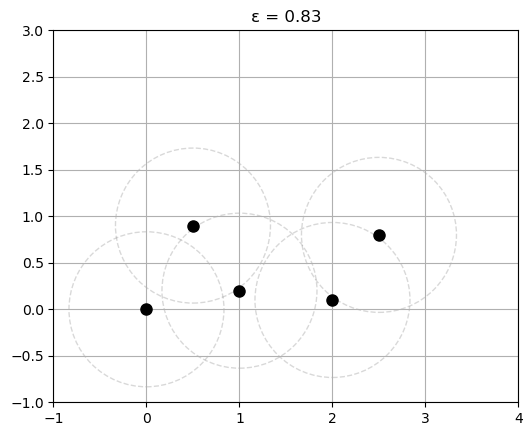

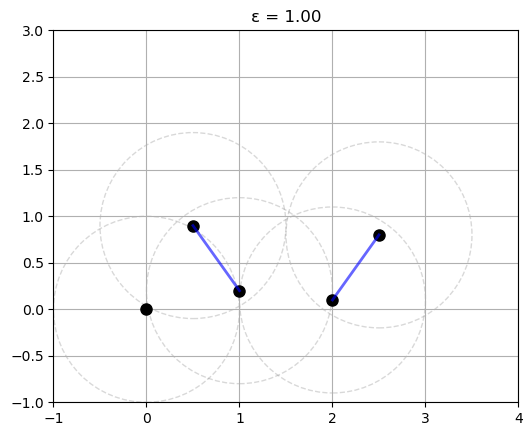

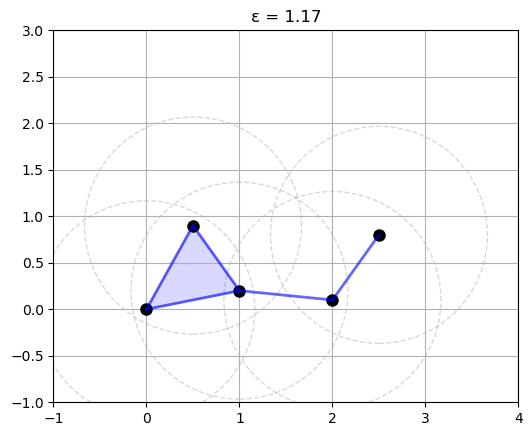

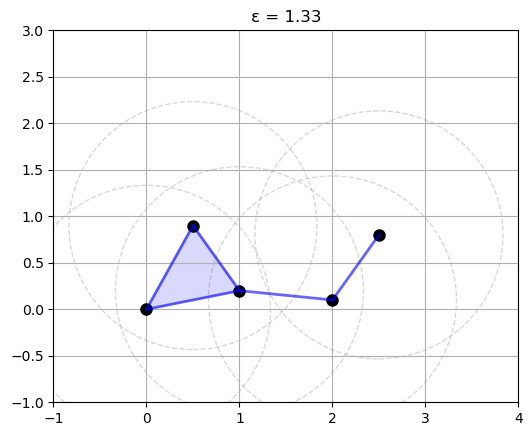

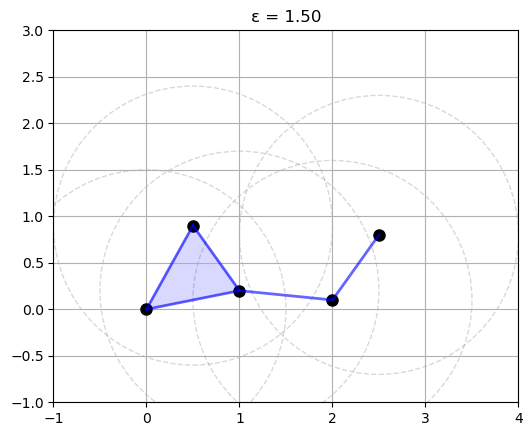

In [17]:
# 🔧 Change ε or toggle between True/False for the complexes here
for i in epses: 
    plot_complex(eps=i, draw_rips=True, draw_cech=False)

# Rips Complex

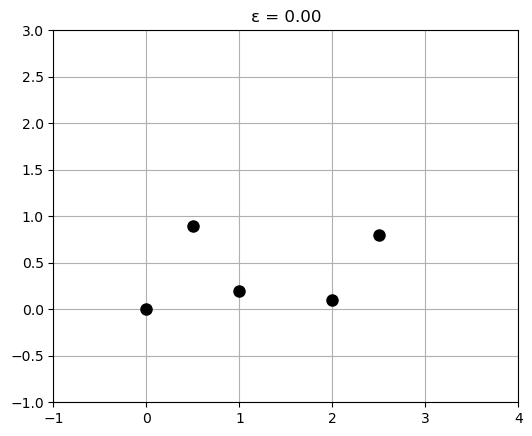

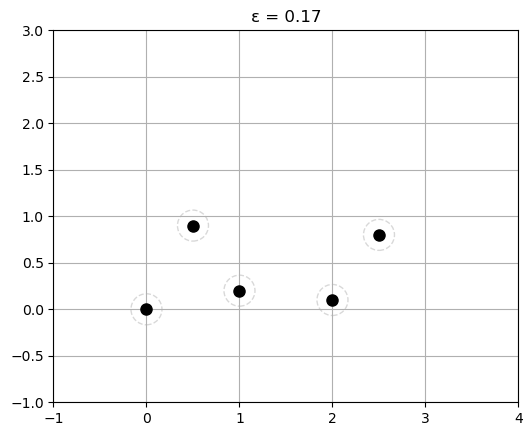

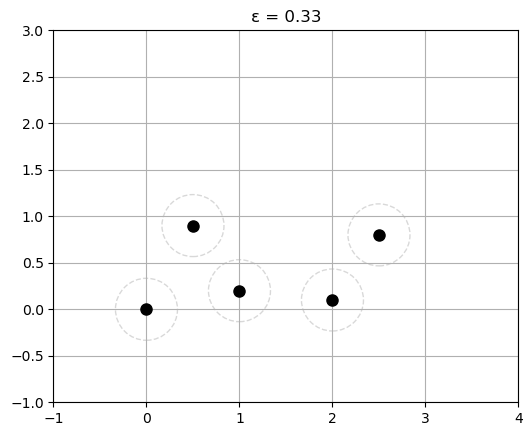

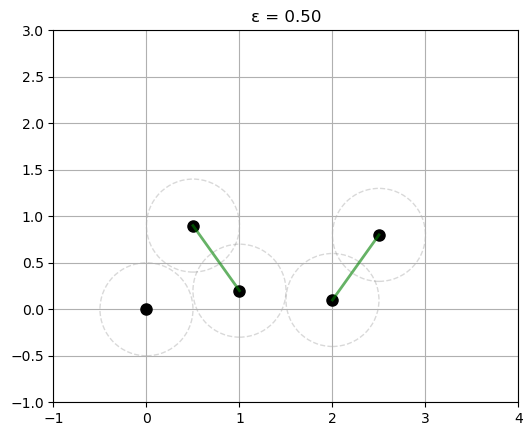

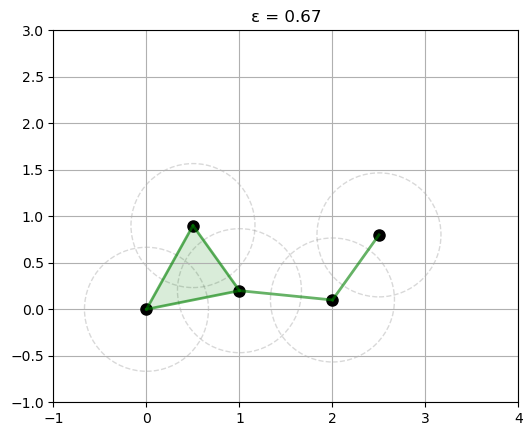

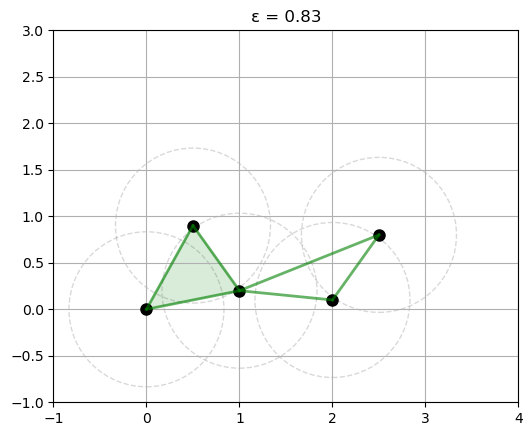

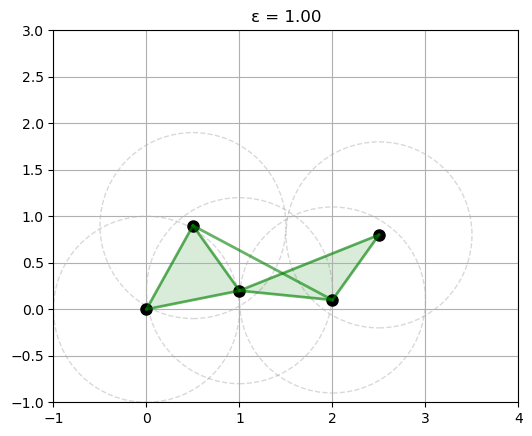

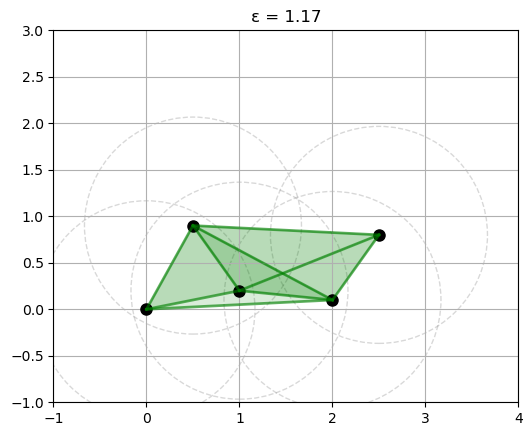

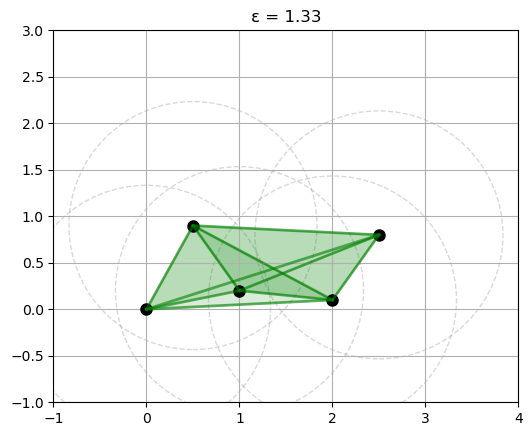

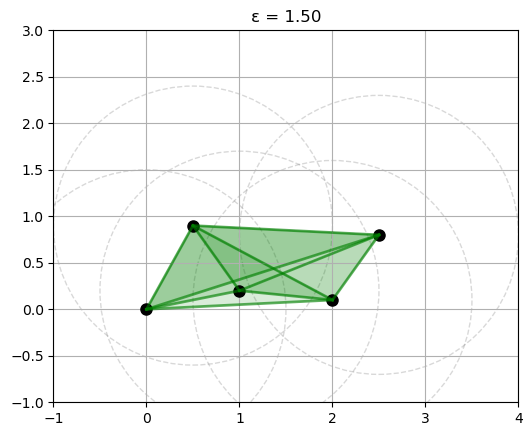

In [18]:
# 🔧 Change ε or toggle between True/False for the complexes here
for i in epses: 
    plot_complex(eps=i, draw_rips=False, draw_cech=True)